In [6]:
from skimage import io
from skimage.transform import resize
import math 
import pickle 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from os import listdir, path, makedirs
import cv2 
import os

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [7]:
def load_images_from_folder(folder,label):
    images = []
    labels = []
    imageNames = []
    for filename in os.listdir(folder):
        if '.jpg' in filename or '.JPG' in filename:
            # img = io.imread(os.path.join(folder,filename)) /255 
            img = cv2.imread(os.path.join(folder,filename))
            img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (100,100), interpolation = cv2.INTER_AREA)
            img = img/255
            if img is not None:
                images.append(img)
                labels.append(label)
                imageNames.append(filename)
    return np.array(images),np.array(labels),imageNames

In [8]:
data_dir = 'C:/Users/Mo Nader/Desktop/Pattern recognition/Project-2/dataset2'

In [9]:
folder_names = [f for f in listdir(data_dir)]

In [10]:
count_img = 0
for folder in folder_names:
    imgs = [img for img in listdir(path.join(data_dir, folder))]
    count_img += len(imgs)
    print(folder, len(imgs))

airplanes 800
bonsai 128
brain 98
car_side 123
laptop 81
Leopards 200
Motorbikes 798
starfish 86
sunflower 85
watch 239


In [11]:
Airplanes,Airplane_labels,imagenames0         = load_images_from_folder(path.join(data_dir, 'airplanes'),'Airplane')
Bonsai,Bonsai_labels,imagenames1              = load_images_from_folder(path.join(data_dir, 'bonsai'),'Bonsai')
Brain,Brain_labels,imagenames2                = load_images_from_folder(path.join(data_dir, 'brain'),'Brain')
Car_side,Car_side_labels,imagenames3          = load_images_from_folder(path.join(data_dir, 'car_side'),'Car-side')
Laptop,Laptop_labels,imagenames4              = load_images_from_folder(path.join(data_dir, 'laptop'),'Laptop')
Leopards,Leopards_labels,imagenames5          = load_images_from_folder(path.join(data_dir, 'Leopards'),'Leopards')
Motorbikes,Motorbike_labels,imagenames6       = load_images_from_folder(path.join(data_dir, 'Motorbikes'),'Motorbike')
Starfish,Starfish_labels,imagenames7          = load_images_from_folder(path.join(data_dir, 'starfish'),'Starfish')
Sunflower,Sunflower_labels,imagenames8        = load_images_from_folder(path.join(data_dir, 'sunflower'),'Sunflower')
Watch,Watch_labels,imagenames9                = load_images_from_folder(path.join(data_dir, 'watch'),'Watch')

In [12]:
X = []
Y = []
imageNames = [] 


for i in range(len(Airplanes)):
    X.append(Airplanes[i])
    Y.append(Airplane_labels[i])
    imageNames.append('Airplanes - ' + imagenames0[i])

for i in range(len(Bonsai)):
    X.append(Bonsai[i])
    Y.append(Bonsai_labels[i])
    imageNames.append('Bonsai - ' + imagenames1[i])

for i in range(len(Brain)):
    X.append(Brain[i])
    Y.append(Brain_labels[i])
    imageNames.append('Brain - ' + imagenames2[i])

for i in range(len(Car_side)):
    X.append(Car_side[i])
    Y.append(Car_side_labels[i])
    imageNames.append('Car_side - ' + imagenames3[i])

for i in range(len(Laptop)):
    X.append(Laptop[i])
    Y.append(Laptop_labels[i])
    imageNames.append('Laptop - ' + imagenames4[i])

for i in range(len(Leopards)):
    X.append(Leopards[i])
    Y.append(Leopards_labels[i])
    imageNames.append('Leopards - ' + imagenames5[i])

for i in range(len(Motorbikes)):
    X.append(Motorbikes[i])
    Y.append(Motorbike_labels[i])
    imageNames.append('Motorbike - ' + imagenames6[i])

for i in range(len(Starfish)):
    X.append(Starfish[i])
    Y.append(Starfish_labels[i])
    imageNames.append('Starfish - ' + imagenames7[i])

for i in range(len(Sunflower)):
    X.append(Sunflower[i])
    Y.append(Sunflower_labels[i])
    imageNames.append('Sunflower - ' + imagenames8[i])

for i in range(len(Watch)):
    X.append(Watch[i])
    Y.append(Watch_labels[i])
    imageNames.append('Watch - ' + imagenames9[i])


In [13]:
# X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 3)

temp = list(zip(X, Y,imageNames))
random.shuffle(temp)
X, Y,imageNames = zip(*temp)
del temp
X = np.array(X,dtype=float)
Y = np.array(Y)

In [14]:
label_encoder = LabelEncoder()
Y_integer_encoded = label_encoder.fit_transform(Y)
Y_integer_encoded

array([0, 0, 0, ..., 1, 3, 0], dtype=int64)

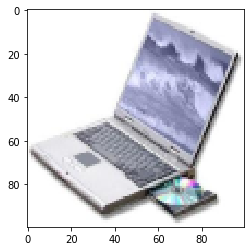

Laptop
Laptop - image_0004.jpg


In [15]:
plt.imshow(X[10])
plt.show()

print(Y[10])
print(imageNames[10])

In [16]:
X.shape

(2638, 100, 100, 3)

In [17]:
Y.shape

(2638,)

In [18]:
len(imageNames)

2638

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(confusion_matrix, class_names, errors_only=False, figsize = (50,20), fontsize=3):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap.  Zeroes are
    colored white.  Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white.  Get more decicmals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix. 
    class_names: list
        List of class names in the order they index the confusion matrix.
    figsize: tuple
        A pair tuple.  The first value is figure width.  The second
        value is figure height. Defaults to (15,6).
    fontsize: int
        Font size for axes labels. Defaults to 16.
    """        
    #Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace = 0.5)
    
    #Show errors only by filling diagonal with zeroes.
    if errors_only:
        np.fill_diagonal(confusion_matrix, 0)        
        
    # ax1 - Normalized Confusion Matrix    
    #Normalize by dividing (M X M) matrix by (M X 1) matrix.  (M X 1) is row totals.
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  #fix any nans caused by zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_cm_norm, ax=ax1, cmap='Blues', fmt='.3f', annot=True, annot_kws={"size": fontsize},
              linewidths=2, linecolor='black', cbar=False)
    
    ax1.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix messed up ylim
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # ax2 - Confusion Matrix - Class Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)    
    heatmap = sns.heatmap(df_cm, ax=ax2, cmap='Blues', fmt='d', annot=True, annot_kws={"size": fontsize+4},
              linewidths=2, linecolor='black', cbar=False)   
    
    ax2.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix bug in matplotlib 3.1.1.  Or, use earlier matplotlib.
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - Class Counts', pad=15, fontsize=fontsize, color='black')    
  
    for text in ax1.texts:
        if text.get_text() == '0.000':
            text.set_color(color='white')            
    for text in ax2.texts:
        if text.get_text() == '0':
            text.set_color(color='white')

In [19]:
m = keras.models.load_model('C:/Users/Mo Nader/Desktop/Pattern recognition/Project-2/caltech/content/my_model_caltech')

In [20]:
predected_labels = m.predict_classes(np.array(X))

C:\Users\Mo Nader\AppData\Roaming\Python\Python37\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
predected_labels

array([0, 0, 0, ..., 1, 3, 0], dtype=int64)

In [21]:
predictions_test = label_encoder.inverse_transform(predected_labels)

In [29]:
predictions_test

array(['Airplane', 'Airplane', 'Airplane', ..., 'Bonsai', 'Car-side',
       'Airplane'], dtype='<U9')

In [39]:
from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix

labels = ['Bonsai','Motorbikes','Car_side','Airplanes','Sunflower','Laptop','Starfish','Watch','Leopards','Brain']

callsReport = classification_report(Y_integer_encoded, predected_labels, target_names=labels)

In [40]:
print(callsReport)

              precision    recall  f1-score   support

      Bonsai       0.99      1.00      0.99       800
  Motorbikes       0.98      0.95      0.96       128
    Car_side       0.97      0.90      0.93        98
   Airplanes       0.96      0.98      0.97       123
   Sunflower       0.92      0.94      0.93        81
      Laptop       0.98      0.98      0.98       200
    Starfish       1.00      0.99      1.00       798
       Watch       0.91      0.98      0.94        86
    Leopards       0.98      0.95      0.96        85
       Brain       0.96      0.97      0.97       239

    accuracy                           0.98      2638
   macro avg       0.96      0.96      0.96      2638
weighted avg       0.98      0.98      0.98      2638



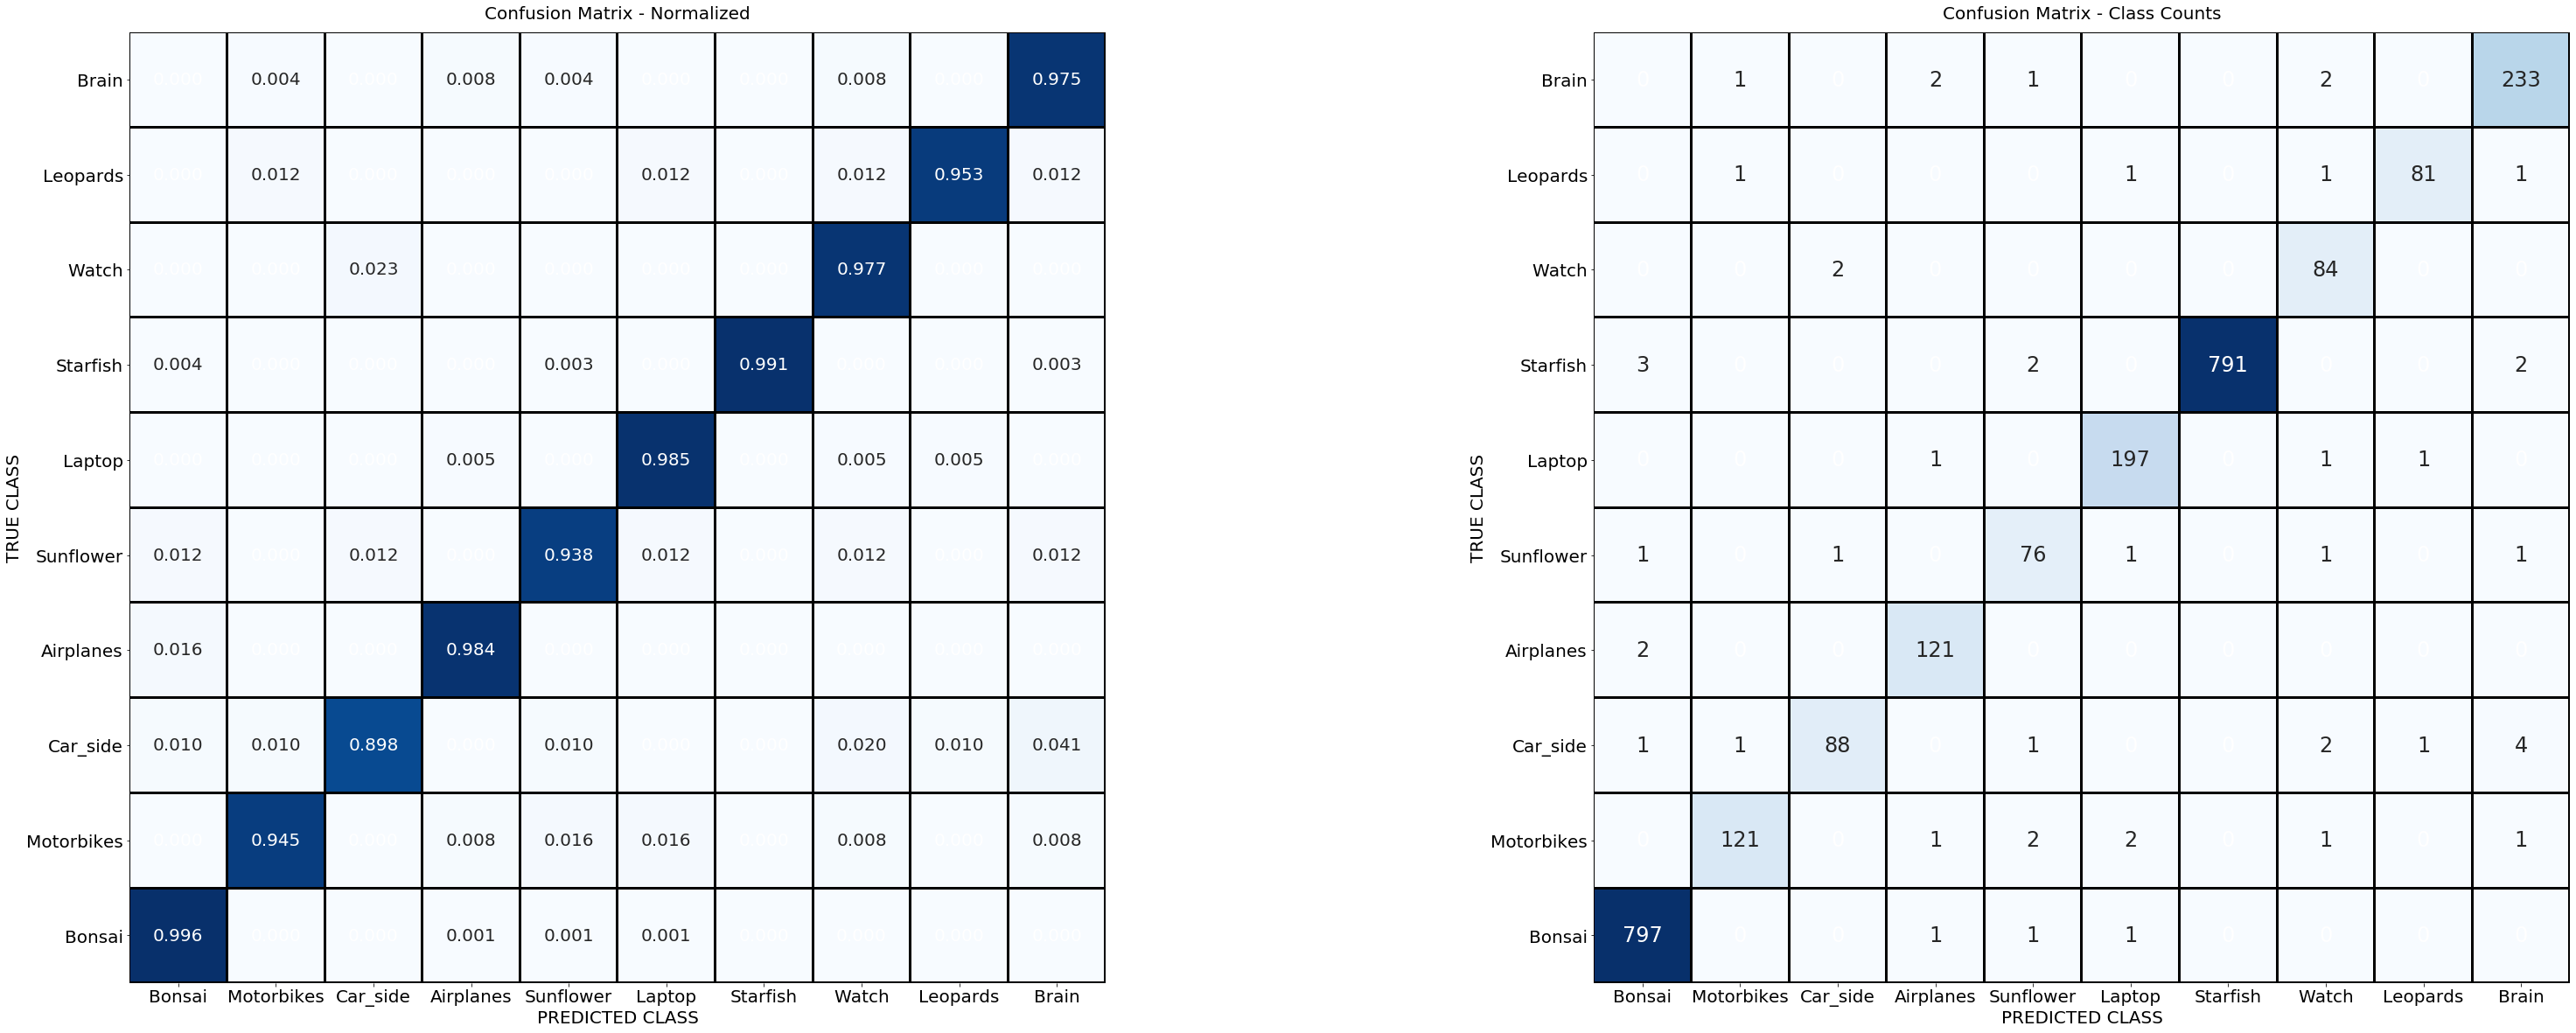

In [53]:
matrix = confusion_matrix(Y_integer_encoded,predected_labels)

plot_confusion_matrix(confusion_matrix=matrix, class_names=labels, errors_only=False, fontsize=20)

['bonsai',
 'Motorbikes',
 'car_side',
 'airplanes',
 'sunflower',
 'laptop',
 'starfish',
 'watch',
 'Leopards',
 'brain']